In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
def print_stats(data, metric, phenotypes):
    print()
    print(f"Metric {metric}")
    for pt in phenotypes:
        print(pt)
        print(f"    mean: {round(data[f'{pt}_{metric}'].mean(), 4)}")
        print(f"    var: {round(data[f'{pt}_{metric}'].var(), 4)}")
        print(f"    std: {round(data[f'{pt}_{metric}'].std(), 4)}")
    print()
    
def detected_outliers(data, phenotype, metric, margin):
    t = data[data[f"{phenotype}_{metric}"] > margin]
    
    files = t["filename"].tolist()
    values = t[f"{phenotype}_{metric}"].tolist()
    
    print(f"Nro. Files: {len(files)}")
    for v in zip(files, values):
        print(f"{v[0]} | {v[1]}")

def plot_boxplot_metric(data, phenotype, metric):
    data_plot = {}

    for pt in phenotypes:
        p = pt.split("-")[1]
        if p == phenotype:
            data_plot[pt] = data[f"{pt}_{metric}"]

    plt.rc('xtick', labelsize=20) 
    plt.rc('ytick', labelsize=20) 

    # plt.figure(figsize=(2, 10))
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.boxplot(data_plot.values())
    ax.set_title(f'Error absoluto medio (MAE)', fontsize=20)
    plt.xticks([1, 2, 3], ['SM300', 'SM60', 'Ratio'])
    ax.set_xlabel(f'{phenotype}', fontsize=20)
    ax.set_ylabel('Error', fontsize=20)
    #ax.set_xticklabels(data_plot.keys())

In [35]:
EXP_NUM = 1
TOP_N_FEATURE = 10

phenotypes = [
    "SM300-Efficiency", "SM300-Rate", "SM300-Lag", "SM300-AUC",
    "SM60-Efficiency",  "SM60-Rate",  "SM60-Lag",  "SM60-AUC",
    "Ratio-Efficiency", "Ratio-Rate", "Ratio-Lag", "Ratio-AUC",
]


files_data_df = pd.read_csv(f"/home/khaldrem/code/sc_regmod/dataset/models/exp_{EXP_NUM}_file_data.csv")
data_scoring_metrics = pd.read_csv(f'/home/khaldrem/code/sc_regmod/dataset/models/filter/{EXP_NUM}/csv/scoring_metrics_overall.csv')

In [36]:
print(f"Archivos que quedan fuera: {files_data_df.loc[files_data_df['data_length'] <= TOP_N_FEATURE].shape[0]}")
print(f"Litado: {files_data_df.loc[files_data_df['data_length'] <= TOP_N_FEATURE]['filename'].tolist()}")

Archivos que quedan fuera: 240
Litado: ['YLR038C', 'YJL119C', 'YAR053W', 'YDL016C', 'YCR040W', 'YGR076C', 'YKL058W', 'YDR008C', 'YGL147C', 'YKL224C', 'YOR327C', 'YLR229C', 'YNL170W', 'YNL043C', 'YDR139C', 'YDR154C', 'YBL077W', 'YJL143W', 'YPL047W', 'YNL122C', 'YOR369C', 'YPR050C', 'YPR052C', 'YLR390W', 'YBR109C', 'YAR068W', 'YJR034W', 'YAR069C', 'YPL037C', 'YGR037C', 'YDR377W', 'YER058W', 'YER159C', 'YMR174C', 'YDR385W', 'YPR044C', 'YHR193C', 'YPR166C', 'YHR148W', 'YOR300W', 'YDR327W', 'YLR264W', 'YDR045C', 'YEL027W', 'YDL184C', 'YFL058W', 'YOR282W', 'YHR053C', 'YDL050C', 'YNL244C', 'YGR226C', 'YGR242W', 'YLR200W', 'YNL013C', 'YBL003C', 'YER189W', 'YKL056C', 'YGR011W', 'YDR100W', 'YBL070C', 'YOL035C', 'YJL179W', 'YML009C', 'YLR325C', 'YBL026W', 'YGL108C', 'YJL064W', 'YML129C', 'YMR071C', 'YOR224C', 'YKL152C', 'YKL153W', 'YJL003W', 'YDR086C', 'YMR321C', 'YJR157W', 'YHL046C', 'YLR327C', 'YDL181W', 'YGR085C', 'YLR230W', 'YFL005W', 'YGR018C', 'YGR020C', 'YPR038W', 'YDL163W', 'YPL046C', 'YM

In [37]:
print(f"Cantidad de modelos entrenado por fenotipo: { (files_data_df.loc[files_data_df['data_length'] <= TOP_N_FEATURE].shape[0])}")

Cantidad de modelos entrenado por fenotipo: 240


In [38]:
detected_outliers(data_scoring_metrics, "SM300-Efficiency", "MAE", 1)

Nro. Files: 0


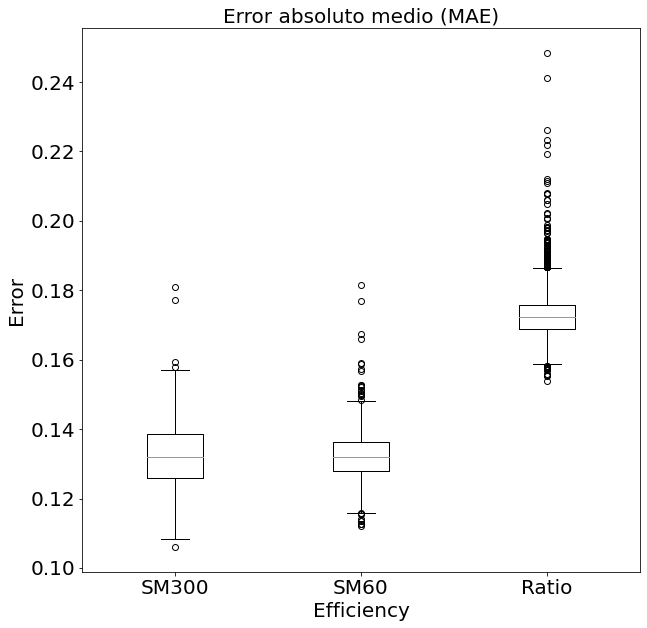

In [39]:
plot_boxplot_metric(data_scoring_metrics, "Efficiency", "MAE")

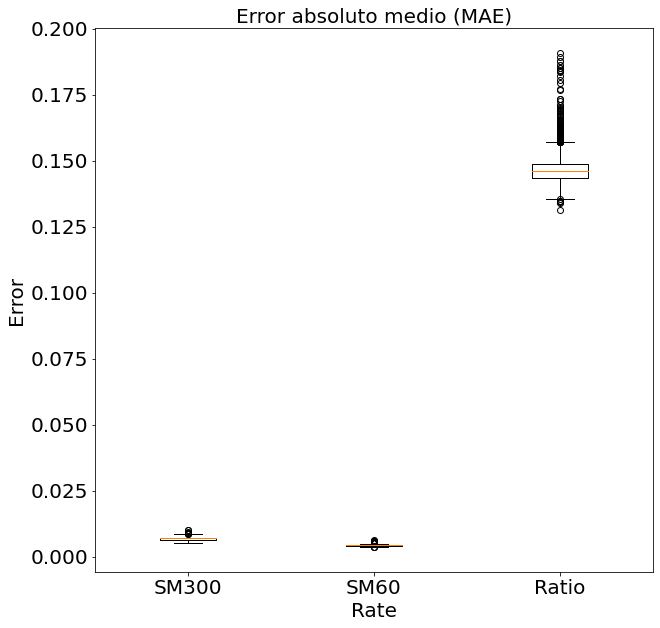

In [40]:
plot_boxplot_metric(data_scoring_metrics, "Rate", "MAE")

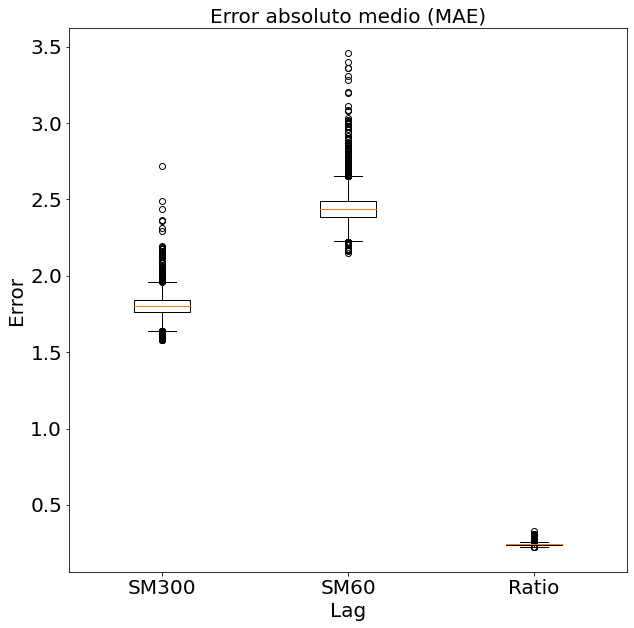

In [41]:
plot_boxplot_metric(data_scoring_metrics, "Lag", "MAE")

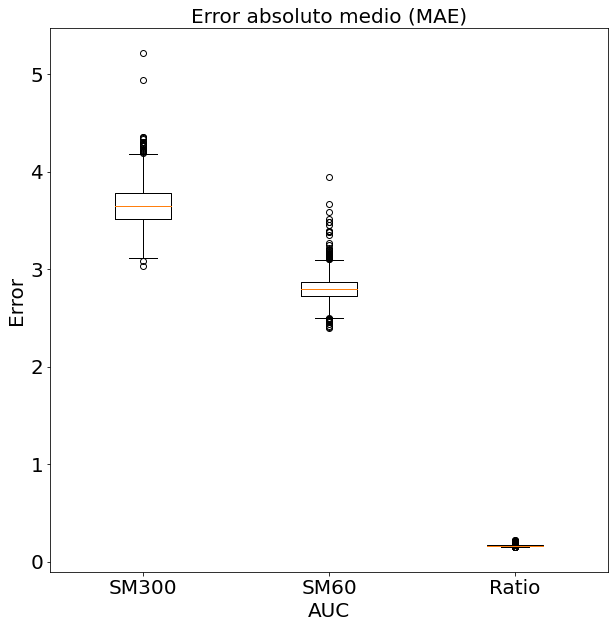

In [42]:
plot_boxplot_metric(data_scoring_metrics, "AUC", "MAE")

In [24]:
time_df = pd.read_csv(f'/home/khaldrem/code/sc_regmod/dataset/models/filter/{EXP_NUM}/csv/time_metrics_overall.csv')

In [12]:
time_df.head()

,Unnamed: 0,filename,total_per_file,SM300-Efficiency_training_model_time,SM300-Efficiency_test_model_time,SM300-Rate_training_model_time,SM300-Rate_test_model_time,SM300-Lag_training_model_time,SM300-Lag_test_model_time,SM300-AUC_training_model_time,...,SM60-AUC_training_model_time,SM60-AUC_test_model_time,Ratio-Efficiency_training_model_time,Ratio-Efficiency_test_model_time,Ratio-Rate_training_model_time,Ratio-Rate_test_model_time,Ratio-Lag_training_model_time,Ratio-Lag_test_model_time,Ratio-AUC_training_model_time,Ratio-AUC_test_model_time
0,0,YCL059C,2.7326,0.8809,0.0077,0.1584,0.0009,0.1806,0.0008,0.1785,...,0.1569,0.0018,0.1377,0.0008,0.1361,0.0009,0.1419,0.0009,0.1363,0.0027
1,1,YBR004C,2.8590,0.1732,0.0062,0.1943,0.0078,0.2241,0.0317,0.1698,...,0.1963,0.0061,0.1851,0.0244,0.2014,0.0117,0.1914,0.0100,0.2090,0.0084
2,2,YDR241W,3.6675,0.3090,0.0158,0.2507,0.0114,0.3211,0.0021,0.2986,...,0.2253,0.0070,0.2353,0.0076,0.2126,0.0069,0.2544,0.0060,0.2422,0.0039
3,3,YEL023C,10.0460,0.8069,0.0478,0.8756,0.0128,0.7724,0.0165,0.8264,...,0.7126,0.0195,0.7796,0.0182,0.7255,0.0154,0.8313,0.0212,0.7323,0.0261
4,4,YMR303C,4.9308,0.2730,0.0047,0.3508,0.0132,0.3666,0.0232,0.3961,...,0.3618,0.0135,0.3910,0.0076,0.4331,0.0239,0.3521,0.0054,0.3645,0.0156


In [13]:
time_df.describe()

,Unnamed: 0,total_per_file,SM300-Efficiency_training_model_time,SM300-Efficiency_test_model_time,SM300-Rate_training_model_time,SM300-Rate_test_model_time,SM300-Lag_training_model_time,SM300-Lag_test_model_time,SM300-AUC_training_model_time,SM300-AUC_test_model_time,...,SM60-AUC_training_model_time,SM60-AUC_test_model_time,Ratio-Efficiency_training_model_time,Ratio-Efficiency_test_model_time,Ratio-Rate_training_model_time,Ratio-Rate_test_model_time,Ratio-Lag_training_model_time,Ratio-Lag_test_model_time,Ratio-AUC_training_model_time,Ratio-AUC_test_model_time
count,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000,...,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000,5720.000000
mean,2859.500000,3.569326,0.248509,0.009857,0.266884,0.009934,0.269045,0.010105,0.269682,0.009925,...,0.269310,0.010046,0.268966,0.009946,0.268968,0.010206,0.269619,0.010106,0.269229,0.009983
std,1651.366101,3.224369,0.256866,0.008405,0.258156,0.008324,0.260792,0.008755,0.261311,0.008466,...,0.262598,0.008568,0.262922,0.008422,0.262518,0.008609,0.263023,0.008599,0.263026,0.008494
min,0.000000,1.377100,0.099100,0.000500,0.098700,0.000500,0.099700,0.000500,0.098800,0.000500,...,0.098300,0.000500,0.100700,0.000500,0.100500,0.000500,0.100500,0.000500,0.099600,0.000500
25%,1429.750000,2.296325,0.141700,0.003300,0.158600,0.003500,0.159400,0.003600,0.158700,0.003600,...,0.157000,0.003600,0.156900,0.003400,0.156900,0.003600,0.156900,0.003600,0.156600,0.003400
50%,2859.500000,2.686050,0.173200,0.007800,0.195500,0.007900,0.196100,0.007800,0.196250,0.007900,...,0.193850,0.007900,0.195000,0.007900,0.194700,0.008000,0.195000,0.007900,0.194650,0.007900
75%,4289.250000,3.607350,0.242725,0.015000,0.267400,0.014700,0.268400,0.015000,0.271600,0.014400,...,0.268400,0.014800,0.271700,0.014900,0.269600,0.015300,0.270625,0.015100,0.271825,0.014900
max,5719.000000,59.333000,4.810800,0.059600,4.748100,0.064500,4.917100,0.068400,4.735700,0.060500,...,4.658200,0.075100,4.865200,0.075800,4.738700,0.065800,4.868800,0.073400,4.848500,0.065900


Text(0, 0.5, 'Valor')

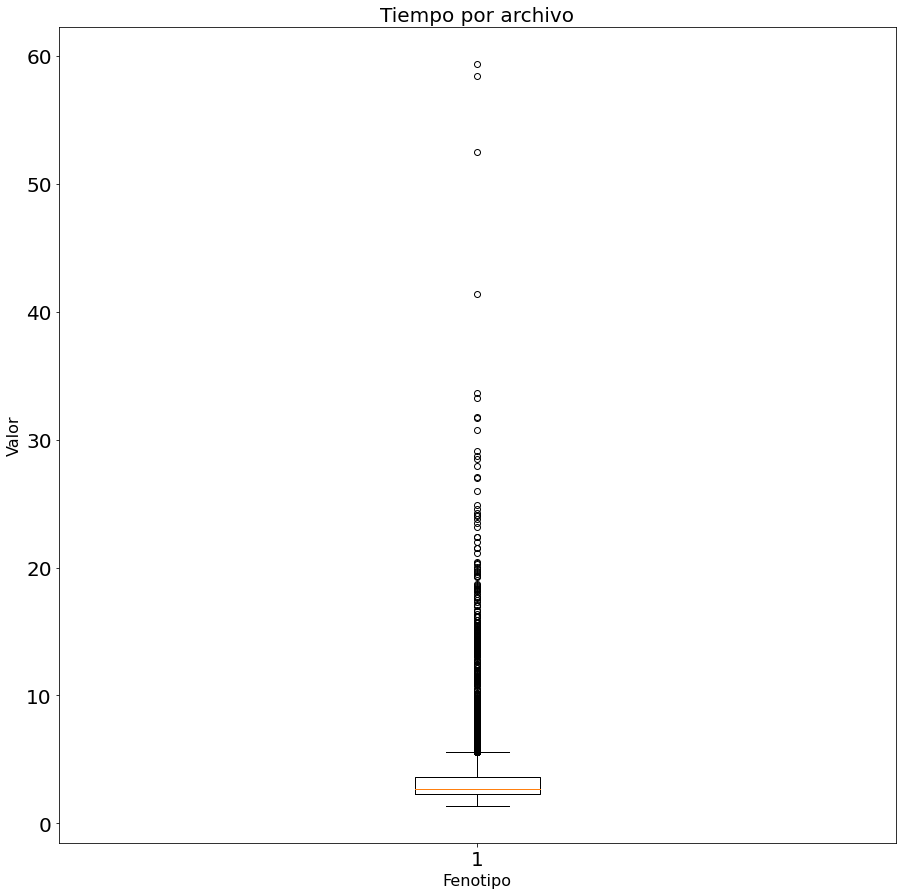

In [14]:
# time_plot = {}

# for pt in phenotypes:
#     p = pt.split("-")[1]
#     if p == "Efficiency":
#         data_plot[pt] = time_df[f"{pt}_{metric}"]

# # plt.figure(figsize=(2, 10))
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.boxplot(data_plot.values())
# ax.set_title(f'{phenotype} - Error absoluto medio (MAE)', fontsize=20)
# ax.set_xlabel('Fenotipo', fontsize=16)
# ax.set_ylabel('Valor', fontsize=16)
# ax.set_xticklabels(data_plot.keys())



fig, ax = plt.subplots(figsize=(15, 15))
ax.boxplot(time_df["total_per_file"])
ax.set_title(f'Tiempo por archivo', fontsize=20)
ax.set_xlabel('Fenotipo', fontsize=16)
ax.set_ylabel('Valor', fontsize=16)
# ax.set_xticklabels(data_plot.keys())
